In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.wrappers.scikit_learn import KerasClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

In [2]:
data = pd.read_csv('data_lyrics.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2,3,17,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.tail(5)

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics
93622,6h4Yp7LPev3PNZvMrFCzC0,Lapinha,Fool On The Hill,Sergio Mendes,0.7630,0.658,188373.0,0.455,0.000000,2.0,0.0827,-15.270,1.0,0.0464,90.961,4.0,0.963,2xzotT2hYczm1r71dtkpYS,1968-01-01,1968.0,188373.0,Sergio Mendes188373Lapinha0.7630.6579999999999...,0.7500,"[""Sergio Mendes & Brasil '66""]",0.659,188373,0.457,0,0.000001,2,0.0823,-15.447,1,Lapinha,25,1968-01-01,0.0414,90.615,0.964,1968,1968,Sergio Mendes & Brasil '66,Sergio Mendes & Brasil '66188373Lapinha0.750.6...,1,Quando eu morrer me enterre na Lapinha Quando ...
93623,6h5w4ez470ZaXq6sD2FozJ,Didn't Know It Was Love,Too Hot To Sleep,Survivor,0.1220,0.613,262800.0,0.683,0.000000,2.0,0.2410,-11.156,1.0,0.0332,128.416,4.0,0.637,1vDCPR1K9O81nzU2bRWYNE,1988,1988.0,262800.0,Survivor262800Didn't Know It Was Love0.1220.61...,0.1220,['Survivor'],0.613,262800,0.683,0,0.000000,2,0.2410,-11.156,1,Didn't Know It Was Love,34,1988-09-25,0.0332,128.416,0.637,1988,1988,Survivor,Survivor262800Didn't Know It Was Love0.1220.61...,1,It felt so easy in the morning sun When love w...
93624,6h77X5H4dP9l2jzG92vVv0,The Alternative Polka,Bad Hair Day,"""Weird Al"" Yankovic",0.0914,0.393,290907.0,0.878,0.000000,4.0,0.3190,-7.519,0.0,0.0558,176.646,4.0,0.898,0Jlz2oUJcRROhY8MFMp609,1996-12-31,1996.0,290907.0,"""Weird Al"" Yankovic290907The Alternative Polka...",0.0914,"['""Weird Al"" Yankovic']",0.393,290907,0.878,0,0.000000,4,0.3190,-7.519,0,The Alternative Polka,35,1996-12-31,0.0558,176.646,0.898,1996,1996,"""Weird Al"" Yankovic","""Weird Al"" Yankovic290907The Alternative Polka...",1,"[Part 1 - ""Loser"" by Beck] Soy un perdedor! I'..."
93625,6h8laPks98zPizQ5qahy40,Winterlude,New Morning,Bob Dylan,0.9100,0.329,142947.0,0.389,0.013100,0.0,0.1140,-12.425,1.0,0.0384,50.166,4.0,0.492,48efaobqOTbvnlxbETstey,1970-10-21,1970.0,142947.0,Bob Dylan142947Winterlude0.910.328999999999999...,0.9100,['Bob Dylan'],0.329,142947,0.389,0,0.013100,0,0.1140,-12.425,1,Winterlude,39,1970-10-21,0.0384,50.166,0.492,1970,1970,Bob Dylan,Bob Dylan142947Winterlude0.910.3290.38900.0131...,1,"[Verse 1] Winterlude, Winterlude, oh darling W..."
93626,6h8oQHda1vXeex187OLud3,Chuper Amigos,Jenni,Jenni Rivera,0.5410,0.838,245968.0,0.553,0.000022,8.0,0.0648,-4.725,1.0,0.0432,141.906,4.0,0.970,2TJAjnZKucKaS4CKX0O4Vh,2013-12-17,2013.0,245968.0,Jenni Rivera245968Chuper Amigos0.5410.8380.552...,0.5410,['Jenni Rivera'],0.838,245968,0.553,0,0.000022,8,0.0648,-4.725,1,Chuper Amigos,58,2013-12-17,0.0432,141.906,0.970,2013,2013,Jenni Rivera,Jenni Rivera245968Chuper Amigos0.5410.8380.552...,1,"[Letra de ""Chuper Amigos""] [Intro] Empezamos ..."


In [4]:
len(set(data["artists_d"].unique()))

18392

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93627 entries, 0 to 93626
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93627 non-null  object 
 1   song                30645 non-null  object 
 2   album               30645 non-null  object 
 3   artist              30645 non-null  object 
 4   acousticness_x      30645 non-null  float64
 5   danceability_x      30645 non-null  float64
 6   duration_ms_x       30645 non-null  float64
 7   energy_x            30645 non-null  float64
 8   instrumentalness_x  30645 non-null  float64
 9   key_x               30645 non-null  float64
 10  liveness_x          30645 non-null  float64
 11  loudness_x          30645 non-null  float64
 12  mode_x              30645 non-null  float64
 13  speechiness_x       30645 non-null  float64
 14  tempo_x             30645 non-null  float64
 15  time_signature      30645 non-null  float64
 16  vale

In [7]:
y=data['popularity'].copy()
X=data[col].copy()

In [8]:
X.shape

(93627, 13)

In [9]:
scale_features= X.drop(['explicit','mode_y'],axis=1).columns

In [10]:
scale_features.shape

(11,)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.8,random_state=1234)

## Add Popularity

In [3]:
df = pd.read_csv('0416_all_feature.csv',index_col=0)

In [4]:
df.reset_index(drop= True,inplace=True)

In [6]:
df.grade.value_counts()  

College Graduate    55652
5th Grade           12676
College Level        6418
7th Grade            4923
6th Grade            4684
9th Grade            4545
11th Grade           4519
Name: grade, dtype: int64

In [5]:
df1=df[df['Language']=='en']

In [6]:
df1.shape

(83074, 59)

In [7]:
acoustic_col= ['acousticness_y','danceability_y','duration_ms_y','energy_y','explicit','instrumentalness_y','key_y',
       'liveness_y','loudness_y','mode_y','speechiness_y','tempo_y','valence_y']
lyrics_col = ['num_words','num_syllables','readability','richness','compound','artist_popularity']

In [8]:
pred = df[acoustic_col+lyrics_col+['popularity']]
pred1 = df1[acoustic_col+lyrics_col+['popularity']]

In [9]:
num_cols=list(pred.dtypes[pred.dtypes !='object'].index)
num_cols.remove('explicit')
num_cols.remove('mode_y')
len(num_cols)

18

In [10]:
num_cols

['acousticness_y',
 'danceability_y',
 'duration_ms_y',
 'energy_y',
 'instrumentalness_y',
 'key_y',
 'liveness_y',
 'loudness_y',
 'speechiness_y',
 'tempo_y',
 'valence_y',
 'num_words',
 'num_syllables',
 'readability',
 'richness',
 'compound',
 'artist_popularity',
 'popularity']

In [13]:
num_cols1=list(pred1.dtypes[pred.dtypes !='object'].index)
num_cols1.remove('explicit')
num_cols1.remove('mode_y')
len(num_cols1)

18

In [11]:
hhhh = ['num_words',
 'num_syllables',
 'readability',
 'richness']

In [12]:
len(hhhh)

4

In [14]:
pred1[hhhh[0]]

0        14936.0
1        67800.0
3         5347.0
5         2662.0
7        26510.0
          ...   
93410      528.0
93411      218.0
93413      221.0
93414      645.0
93415      195.0
Name: num_words, Length: 83074, dtype: float64

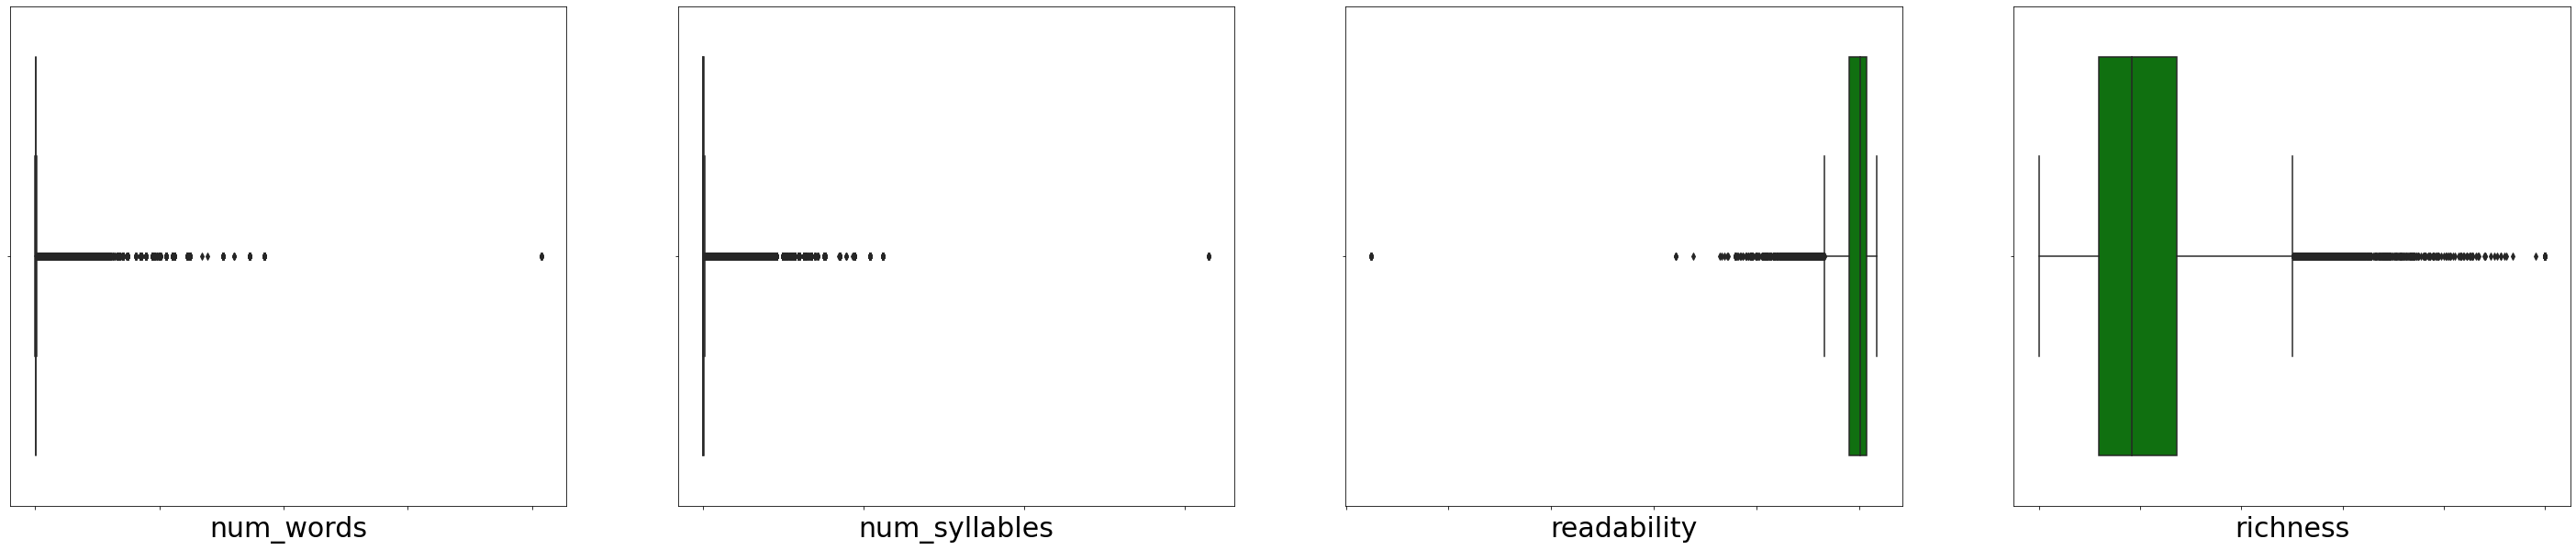

In [26]:
plt.rcParams.update({'font.size': 30})
f, axes = plt.subplots(1, 4,figsize=(50,10))

for j in range(4):
    n=  j
    if n <len(hhhh):
        g=sns.boxplot(pred1[hhhh[n]], ax=axes[j],color='g')
        g.set(xticklabels=[])
        
plt.savefig('outlier_h')

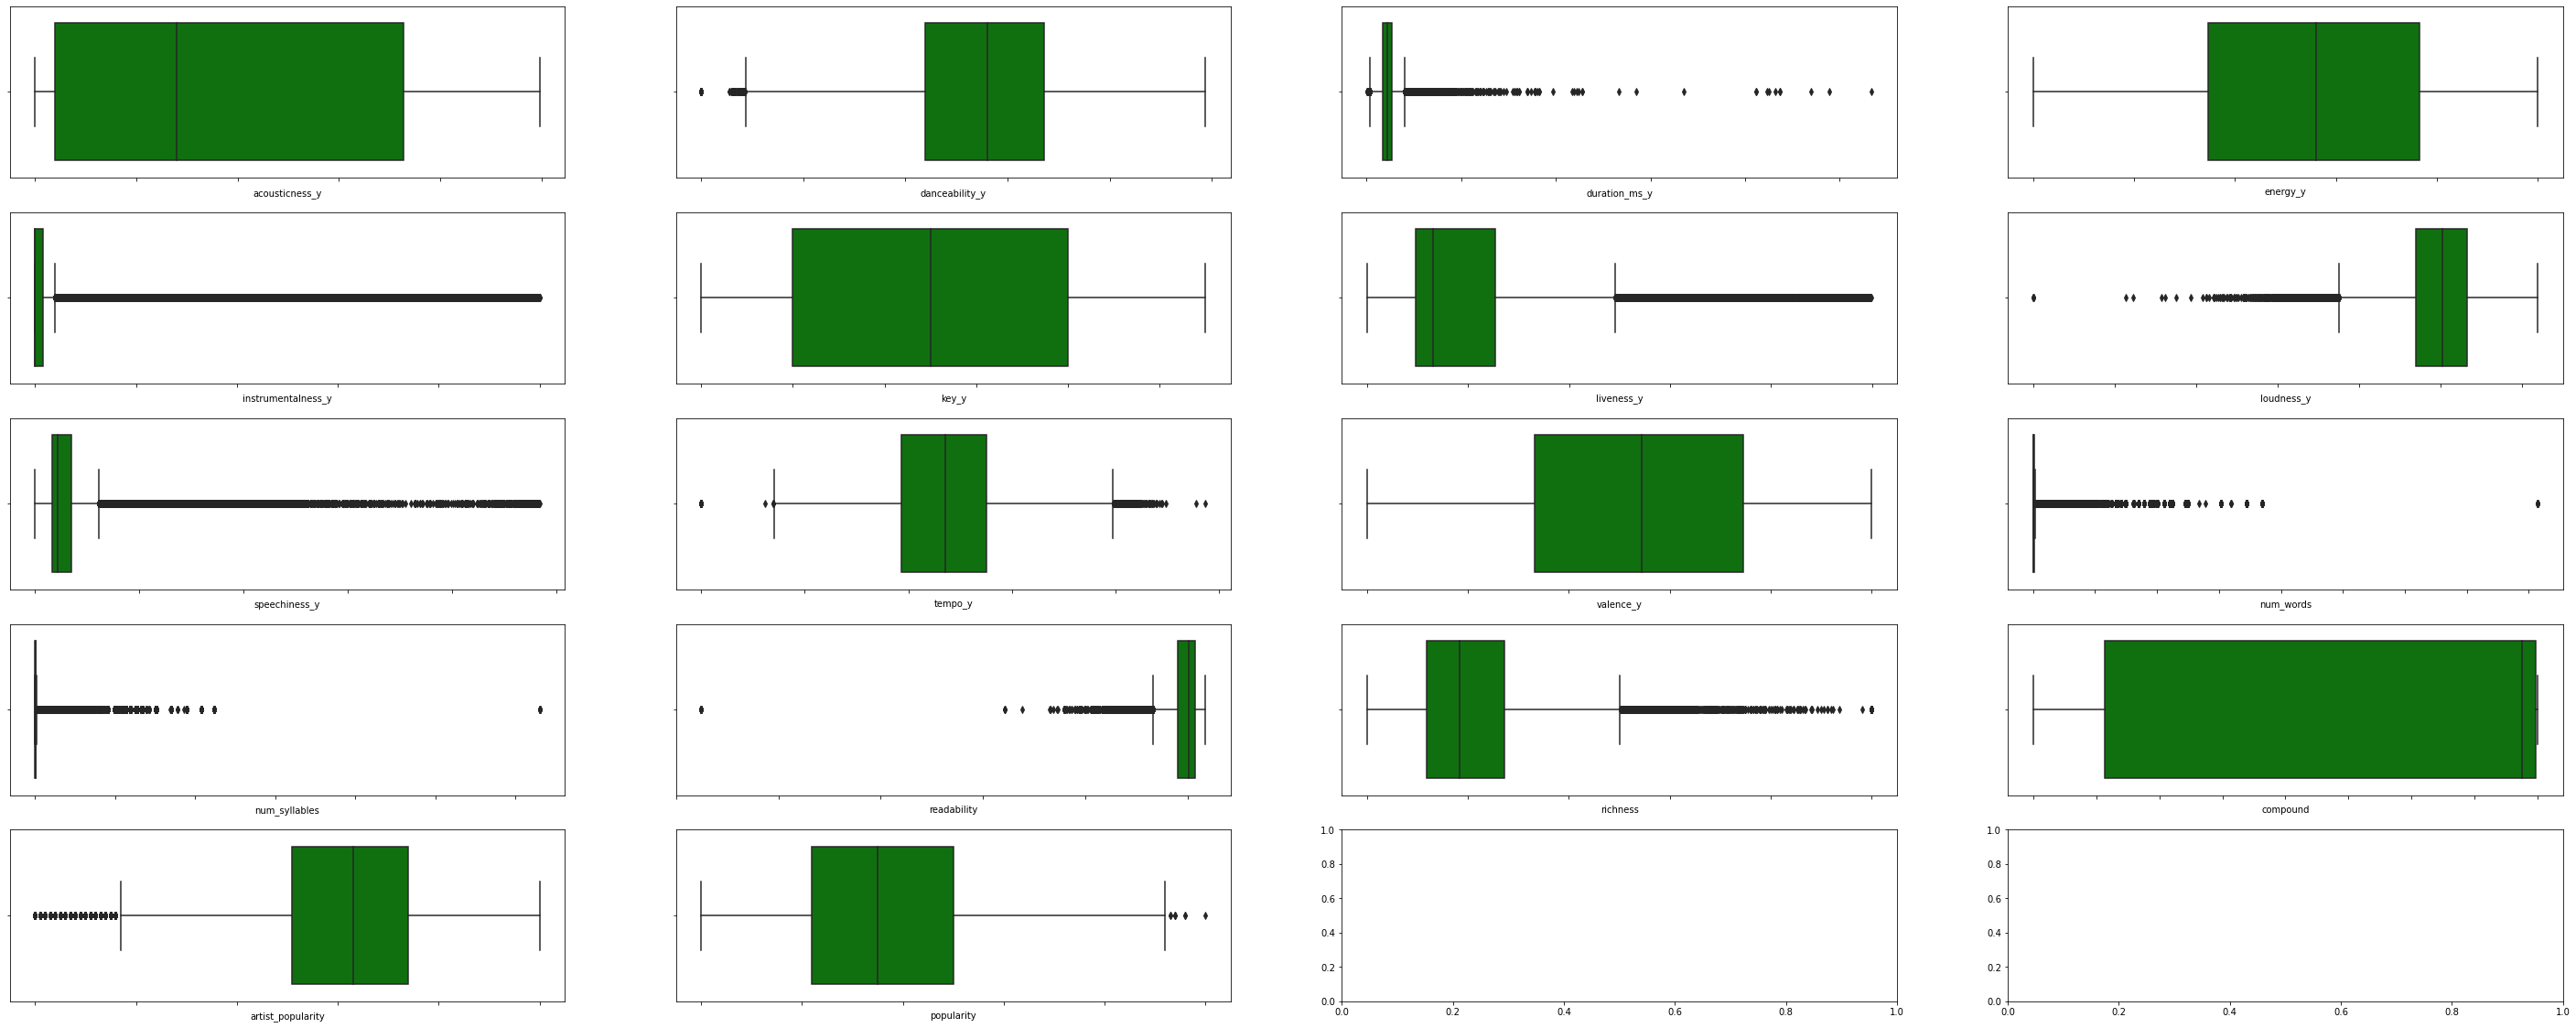

In [21]:
f, axes = plt.subplots(5, 4,figsize=(50,20))
for i in range(5):
    for j in range(4):
        n= i*4+ j
        if n <len(num_cols):
            g=sns.boxplot(pred1[num_cols1[n]], ax=axes[i,j], color='g')
            g.set(xticklabels=[])
plt.savefig('outlier1')

In [16]:
pred.describe()

,acousticness_y,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,valence_y,num_words,num_syllables,readability,richness,compound,artist_popularity,popularity
count,93417.000000,93417.000000,9.341700e+04,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000,93417.000000
mean,0.391879,0.557023,2.287324e+05,0.549090,0.082854,0.099710,5.217551,0.197941,-10.194931,0.717129,0.074297,119.483586,0.548920,5238.349101,6069.141944,-33.590649,0.208304,0.300009,60.855752,35.961292
std,0.345957,0.167915,1.033159e+05,0.252885,0.275663,0.244325,3.524006,0.167501,4.600179,0.450397,0.093941,29.853969,0.255642,18839.902749,22514.286981,162.264780,0.126292,0.844579,18.645186,19.769342
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-9150.182000,0.000000,-1.000000,0.000000,0.000000
25%,0.049400,0.443000,1.736800e+05,0.350000,0.000000,0.000000,2.000000,0.094900,-12.931000,0.000000,0.033300,96.414000,0.343000,195.000000,220.000000,-98.259000,0.119114,-0.789900,52.000000,23.000000
50%,0.306000,0.565000,2.135730e+05,0.556000,0.000000,0.000061,5.000000,0.131000,-9.609000,1.000000,0.042600,117.606000,0.559000,311.000000,338.000000,0.724000,0.186978,0.895700,63.000000,36.000000
75%,0.727000,0.678000,2.633330e+05,0.757000,0.000000,0.011500,8.000000,0.253000,-6.711000,1.000000,0.068100,137.687000,0.763000,697.000000,748.000000,67.435000,0.277829,0.991600,74.000000,50.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,0.999000,1.963000,1.000000,0.967000,243.507000,1.000000,407287.000000,630162.000000,192.300000,1.000000,1.000000,100.000000,100.000000


In [26]:
pred1.describe()

,acousticness_y,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,valence_y,num_words,num_syllables,readability,richness,compound,artist_popularity,popularity
count,83074.000000,83074.000000,8.307400e+04,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000,83074.000000
mean,0.382506,0.552028,2.298160e+05,0.550982,0.090401,0.105325,5.212461,0.199148,-10.278934,0.717818,0.075505,119.394859,0.536589,5667.702446,6499.625418,-30.184524,0.204104,0.365536,60.704796,35.433698
std,0.349493,0.168601,1.058986e+05,0.256785,0.286758,0.249912,3.526950,0.169526,4.640095,0.450064,0.095957,29.690604,0.253672,19657.376591,23276.923010,150.405700,0.121421,0.836442,18.839046,19.715275
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,-4755.493000,0.000000,-1.000000,0.000000,0.000000
25%,0.040000,0.438000,1.732000e+05,0.347000,0.000000,0.000000,2.000000,0.095400,-13.035000,0.000000,0.033300,96.594250,0.332000,205.000000,220.000000,-94.541000,0.118128,-0.714400,51.000000,22.000000
50%,0.279000,0.560000,2.145735e+05,0.560000,0.000000,0.000085,5.000000,0.131000,-9.717000,1.000000,0.042600,117.843500,0.544000,322.000000,341.000000,6.509000,0.183491,0.937700,63.000000,35.000000
75%,0.727000,0.672000,2.649968e+05,0.765000,0.000000,0.015800,8.000000,0.254000,-6.760000,1.000000,0.069000,137.540750,0.746000,778.000000,809.000000,70.956750,0.271605,0.993700,74.000000,50.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,0.999000,1.963000,1.000000,0.967000,243.507000,1.000000,407287.000000,630162.000000,173.842000,1.000000,1.000000,100.000000,100.000000


In [18]:
##If we want to compare results if outliers dropped
def outlier_detect_remove(data, col):
    ''' Detection '''
    # IQR
    data_new = data.copy()

    Q1 = np.percentile(data_new[col], 25,  
                       interpolation = 'midpoint')  

    Q3 = np.percentile(data_new[col], 75, 
                       interpolation = 'midpoint')  
    IQR = Q3 - Q1  

   # print("Old Shape: ", data_new.shape)  
    oldshape= data_new.shape[0]
    # Upper bound 
    upper = np.where(data_new[col] >= (Q3+1.5*IQR)) 
    # Lower bound 
    lower = np.where(data_new[col] <= (Q1-1.5*IQR)) 
    
    ''' Removing the Outliers '''
    data_new.drop(upper[0], inplace = True)
    data_new.drop(lower[0], inplace = True) 

    #print("New Shape: ", data_new.shape)
    newshape= data_new.shape[0]
    del Q1
    del Q3
    del IQR
    del upper
    del lower
    data_new.reset_index(inplace=True,drop=True)
    return -newshape +oldshape

In [27]:
pred1.reset_index(drop=True,inplace=True)

In [20]:
outlier_detect_remove(pred1, 'readability')

2291

In [21]:
num_cols[1]

'danceability_y'

In [22]:
num_cols

['acousticness_y',
 'danceability_y',
 'duration_ms_y',
 'energy_y',
 'instrumentalness_y',
 'key_y',
 'liveness_y',
 'loudness_y',
 'speechiness_y',
 'tempo_y',
 'valence_y',
 'num_words',
 'num_syllables',
 'readability',
 'richness',
 'compound',
 'artist_popularity',
 'popularity']

In [23]:
num_outliers_df=pd.DataFrame(columns= ['features', 'num_outliers'])
for i in range(len(num_cols)):
    if num_cols[i] in ['num_words','num_syllables','readability','duration_ms_y','richness']:
        num= outlier_detect_remove(pred1,num_cols[i])
        num_outliers_df.loc[i,'features'] = num_cols[i]
        num_outliers_df.loc[i,'num_outliers'] = num
        i+=1

In [24]:
num_outliers_df.sort_values(by='num_outliers', ascending=False)

,features,num_outliers
12,num_syllables,16622
11,num_words,16439
2,duration_ms_y,3365
13,readability,2291
14,richness,1778


In [28]:
def outlier_remove(data, col):
    ''' Detection '''
    # IQR
    data_new = data.copy()

    Q1 = np.percentile(data_new[col], 25,  
                       interpolation = 'midpoint')  

    Q3 = np.percentile(data_new[col], 75, 
                       interpolation = 'midpoint')  
    IQR = Q3 - Q1  

   # print("Old Shape: ", data_new.shape)  
    oldshape= data_new.shape[0]
    # Upper bound 
    upper = np.where(data_new[col] >= (Q3+1.5*IQR)) 
    # Lower bound 
    lower = np.where(data_new[col] <= (Q1-1.5*IQR)) 
    
    ''' Removing the Outliers '''
    data_new.drop(upper[0], inplace = True)
    data_new.drop(lower[0], inplace = True) 

    #print("New Shape: ", data_new.shape)
    newshape= data_new.shape[0]
    del Q1
    del Q3
    del IQR
    del upper
    del lower
    data_new.reset_index(inplace=True,drop=True)
    return data_new

In [26]:
d1 = outlier_remove(pred1, 'num_words')
d1

,acousticness_y,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,valence_y,num_words,num_syllables,readability,richness,compound,artist_popularity,popularity
0,0.0309,0.593,187286,0.450,0,0.001870,2,0.3340,-10.679,1,0.0307,112.054,0.454,783.0,735.0,-5.036,0.177977,-0.9857,0.000000,0
1,0.9760,0.369,103333,0.228,0,0.000000,1,0.1500,-9.628,1,0.0300,82.394,0.572,186.0,152.0,90.502,0.076503,-0.8895,5.000000,0
2,0.3660,0.631,324882,0.682,0,0.000000,9,0.3380,-10.486,0,0.0417,150.061,0.386,495.0,527.0,33.028,0.254582,0.9856,46.000000,0
3,0.9260,0.670,170333,0.351,0,0.005310,0,0.1680,-5.714,1,0.0693,140.253,0.580,183.0,179.0,-61.661,0.191257,-0.5831,38.000000,0
4,0.9620,0.572,186227,0.164,0,0.003460,0,0.2470,-15.842,1,0.0471,78.439,0.661,486.0,434.0,69.626,0.200000,0.6788,60.848402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66630,0.1610,0.617,237507,0.921,1,0.000000,9,0.0887,-3.200,1,0.1790,184.028,0.688,528.0,586.0,5.758,0.282443,0.9189,72.000000,55
66631,0.7190,0.738,134453,0.538,0,0.000013,2,0.0653,-10.118,1,0.0374,97.487,0.810,218.0,264.0,-116.886,0.298165,-0.9280,65.000000,57
66632,0.1220,0.613,262800,0.683,0,0.000000,2,0.2410,-11.156,1,0.0332,128.416,0.637,221.0,221.0,-102.080,0.325792,0.9471,72.000000,34
66633,0.0914,0.393,290907,0.878,0,0.000000,4,0.3190,-7.519,0,0.0558,176.646,0.898,645.0,641.0,94.296,0.142857,0.6269,61.000000,35


In [29]:
d2 = outlier_remove(pred1, 'num_syllables')
d2

,acousticness_y,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,valence_y,num_words,num_syllables,readability,richness,compound,artist_popularity,popularity
0,0.0309,0.593,187286,0.450,0,0.001870,2,0.3340,-10.679,1,0.0307,112.054,0.454,783.0,735.0,-5.036,0.177977,-0.9857,0.000000,0
1,0.9760,0.369,103333,0.228,0,0.000000,1,0.1500,-9.628,1,0.0300,82.394,0.572,186.0,152.0,90.502,0.076503,-0.8895,5.000000,0
2,0.3660,0.631,324882,0.682,0,0.000000,9,0.3380,-10.486,0,0.0417,150.061,0.386,495.0,527.0,33.028,0.254582,0.9856,46.000000,0
3,0.9260,0.670,170333,0.351,0,0.005310,0,0.1680,-5.714,1,0.0693,140.253,0.580,183.0,179.0,-61.661,0.191257,-0.5831,38.000000,0
4,0.9620,0.572,186227,0.164,0,0.003460,0,0.2470,-15.842,1,0.0471,78.439,0.661,486.0,434.0,69.626,0.200000,0.6788,60.848402,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66447,0.1610,0.617,237507,0.921,1,0.000000,9,0.0887,-3.200,1,0.1790,184.028,0.688,528.0,586.0,5.758,0.282443,0.9189,72.000000,55
66448,0.7190,0.738,134453,0.538,0,0.000013,2,0.0653,-10.118,1,0.0374,97.487,0.810,218.0,264.0,-116.886,0.298165,-0.9280,65.000000,57
66449,0.1220,0.613,262800,0.683,0,0.000000,2,0.2410,-11.156,1,0.0332,128.416,0.637,221.0,221.0,-102.080,0.325792,0.9471,72.000000,34
66450,0.0914,0.393,290907,0.878,0,0.000000,4,0.3190,-7.519,0,0.0558,176.646,0.898,645.0,641.0,94.296,0.142857,0.6269,61.000000,35


In [29]:
d1.describe()

,acousticness_y,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,valence_y,num_words,num_syllables,readability,richness,compound,artist_popularity,popularity
count,66635.000000,66635.000000,6.663500e+04,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000,66635.000000
mean,0.351102,0.557753,2.285893e+05,0.567797,0.105290,0.068628,5.226112,0.195624,-9.914190,0.721138,0.075353,119.748316,0.542706,339.979665,358.754033,-49.016590,0.218652,0.338062,63.920002,39.475231
std,0.334765,0.166860,8.495971e+04,0.248912,0.306929,0.196361,3.537565,0.162913,4.367115,0.448443,0.090953,29.536816,0.250021,244.498303,257.414113,133.051917,0.124205,0.824852,15.610566,17.922456
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,-1353.168000,0.000000,-1.000000,0.000000,0.000000
25%,0.035200,0.444000,1.761800e+05,0.377000,0.000000,0.000000,2.000000,0.094700,-12.672000,0.000000,0.033000,96.904500,0.341000,185.000000,199.000000,-118.927500,0.131911,-0.703700,55.000000,27.000000
50%,0.235000,0.564000,2.168530e+05,0.580000,0.000000,0.000042,5.000000,0.131000,-9.435000,1.000000,0.042400,117.942000,0.550000,270.000000,288.000000,-22.788000,0.200472,0.897700,65.000000,39.000000
75%,0.663000,0.677000,2.640670e+05,0.775000,0.000000,0.005490,8.000000,0.251000,-6.535000,1.000000,0.070100,137.984500,0.749000,405.000000,420.000000,52.828000,0.286585,0.985600,75.000000,52.000000
max,0.996000,0.988000,4.120258e+06,1.000000,1.000000,0.999000,11.000000,0.999000,1.963000,1.000000,0.965000,243.507000,0.996000,1634.000000,2803.000000,173.842000,1.000000,1.000000,100.000000,100.000000


In [30]:
d2.describe()  # d2 is better

,acousticness_y,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,valence_y,num_words,num_syllables,readability,richness,compound,artist_popularity,popularity
count,66452.000000,66452.000000,6.645200e+04,66452.000000,66452.000000,66452.000000,66452.000000,66452.000000,66452.000000,66452.000000,66452.000000,66452.000000,66452.000000,66452.00000,66452.000000,66452.000000,66452.000000,66452.000000,66452.000000,66452.000000
mean,0.350969,0.558067,2.285764e+05,0.567877,0.105565,0.068100,5.225351,0.195527,-9.909454,0.721077,0.075396,119.762079,0.542914,337.23614,354.410161,-49.124563,0.218148,0.340956,63.918325,39.511241
std,0.334663,0.166817,8.476471e+04,0.248803,0.307282,0.195436,3.537872,0.162700,4.365027,0.448473,0.090928,29.528775,0.249896,239.53272,244.263481,132.843068,0.124063,0.823351,15.582110,17.910422
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,2.00000,2.000000,-1340.125000,0.000000,-1.000000,0.000000,0.000000
25%,0.035200,0.444000,1.762400e+05,0.377000,0.000000,0.000000,2.000000,0.094775,-12.669000,0.000000,0.033000,96.923750,0.341000,184.00000,198.000000,-119.244750,0.131673,-0.696125,55.000000,27.000000
50%,0.235000,0.565000,2.168670e+05,0.580000,0.000000,0.000041,5.000000,0.131000,-9.432000,1.000000,0.042400,117.952500,0.550000,269.00000,288.000000,-23.088500,0.200000,0.898550,65.000000,39.000000
75%,0.663000,0.677000,2.640165e+05,0.775000,0.000000,0.005400,8.000000,0.251000,-6.530750,1.000000,0.070200,137.991000,0.749000,403.00000,419.000000,52.512250,0.285714,0.985600,75.000000,52.000000
max,0.996000,0.988000,4.120258e+06,1.000000,1.000000,0.999000,11.000000,0.997000,1.963000,1.000000,0.965000,243.507000,0.996000,2127.00000,1689.000000,173.842000,1.000000,1.000000,100.000000,100.000000


In [39]:
df1.reset_index(drop=True, inplace=True)

In [40]:
df1.shape

(83074, 59)

In [41]:
outlier_remove1 = outlier_remove(df1, 'num_syllables')
outlier_remove1

,id,song,album,artist,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,speechiness_x,tempo_x,time_signature,valence_x,album_id,date,date_year,duration_ms_d,com_f_x,acousticness_y,artists,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,name,popularity,release_date,speechiness_y,tempo_y,valence_y,year,release_date_year,artists_d,com_f_y,popularity_dummy,lyrics,stats_dict_tuple,num_sentences,num_words,num_syllables,readability,grade,richness,Language,neg,neu,pos,compound,compound_vader_polarity,artist_popularity
0,1mTxphc9naXMLE9qfMkEVh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0309,['The Cotton Candy Blues Band'],0.593,187286,0.450,0,0.001870,2,0.3340,-10.679,1,Early in the morning,0,1940,0.0307,112.054,0.454,1940,1940,The Cotton Candy Blues Band,The Cotton Candy Blues Band187286Early in the ...,0,"money on the table , i ain ' tryna play with y...","({'num_sentences': 6, 'num_words': 783, 'num_s...",6.0,783.0,735.0,-5.036,College Graduate,0.177977,en,0.102,0.846,0.052,-0.9857,-1.0,0.000000
1,2Tp1yCGNjjZ39HTEnKaqhx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9760,['The Keynotes'],0.369,103333,0.228,0,0.000000,1,0.1500,-9.628,1,I Don't Know,0,1945,0.0300,82.394,0.572,1945,1945,The Keynotes,The Keynotes103333I Don't Know0.9760.3690.2280...,0,"i don ' know why i love you like i do oh , my ...","({'num_sentences': 4, 'num_words': 186, 'num_s...",4.0,186.0,152.0,90.502,5th Grade,0.076503,en,0.294,0.455,0.251,-0.8895,-1.0,5.000000
2,3plzStfrkTOq9lehqqI3bG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3660,['EOR'],0.631,324882,0.682,0,0.000000,9,0.3380,-10.486,0,Till,0,1946,0.0417,150.061,0.386,1946,1946,EOR,EOR324882Till0.3660.6310.68200.090.338-10.4860...,0,"hook : i ' just tryna be my own man , my own m...","({'num_sentences': 6, 'num_words': 495, 'num_s...",6.0,495.0,527.0,33.028,College Level,0.254582,en,0.064,0.800,0.136,0.9856,1.0,46.000000
3,2MGhUOnAifh3znlInWnywc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9260,['Lowell Fulson'],0.670,170333,0.351,0,0.005310,0,0.1680,-5.714,1,Fulson Blues,0,1945,0.0693,140.253,0.580,1945,1945,Lowell Fulson,Lowell Fulson170333Fulson Blues0.9260.670.3510...,0,i ain ' heard your voice in such as long time ...,"({'num_sentences': 1, 'num_words': 183, 'num_s...",1.0,183.0,179.0,-61.661,College Graduate,0.191257,en,0.109,0.817,0.074,-0.5831,-1.0,38.000000
4,1vDRvO1X021HlJY2NnqUU2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9620,['Sonny Boy Williamson I'],0.572,186227,0.164,0,0.003460,0,0.2470,-15.842,1,Down South,0,1945,0.0471,78.439,0.661,1945,1945,Sonny Boy Williamson I,Sonny Boy Williamson I186227Down South0.9620.5...,0,hobo blues 3 : 22 trk yank rachel - vocal & gu...,"({'num_sentences': 8, 'num_words': 486, 'num_s...",8.0,486.0,434.0,69.626,9th Grade,0.200000,en,0.034,0.913,0.053,0.6788,1.0,60.848402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66447,6h2t5HKOpHjpou4cHA5OER,Cocky,Cocky,Kid Rock,0.1610,0.617,237507.0,0.921,0.000000,9.0,0.0887,-3.200,1.0,0.1790,184.028,4.0,0.688,64du8CiAmKAzVswhA3RK4r,2001-11-19,2001.0,237507.0,Kid Rock237507Cocky0.1610.6170.920999999999999...,0.1610,['Kid Rock'],0.617,237507,0.921,1,0.000000,9,0.0887,-3.200,1,Cocky,55,2001-11-19,0.1790,184.028,0.688,2001,2001,Kid Rock,Kid Rock237507Cocky0.1610.6170.92110.090.0887-...,1,"guess who ' back i used to be broke , confused...","({'num_sentences': 5, 'num_words': 528, 'num_s...",5.0,528.0,586.0,5.758,College Graduate,0.282443,en,0.108,0.780,0.112,0.9189,1.0,72.000000
66448,6h3YJ05BovN1Pgk145J3r9,Mama Tried,I Am What

In [192]:
outlier_remove1.to_csv("outlier_remove.csv",index=False)

In [72]:
# plt.figure(figsize=(14,14))
# cor = pred.corr()
# x = cor [['readability']]
# sns.heatmap(x, annot=True, cmap=plt.cm.Reds)
# plt.show()

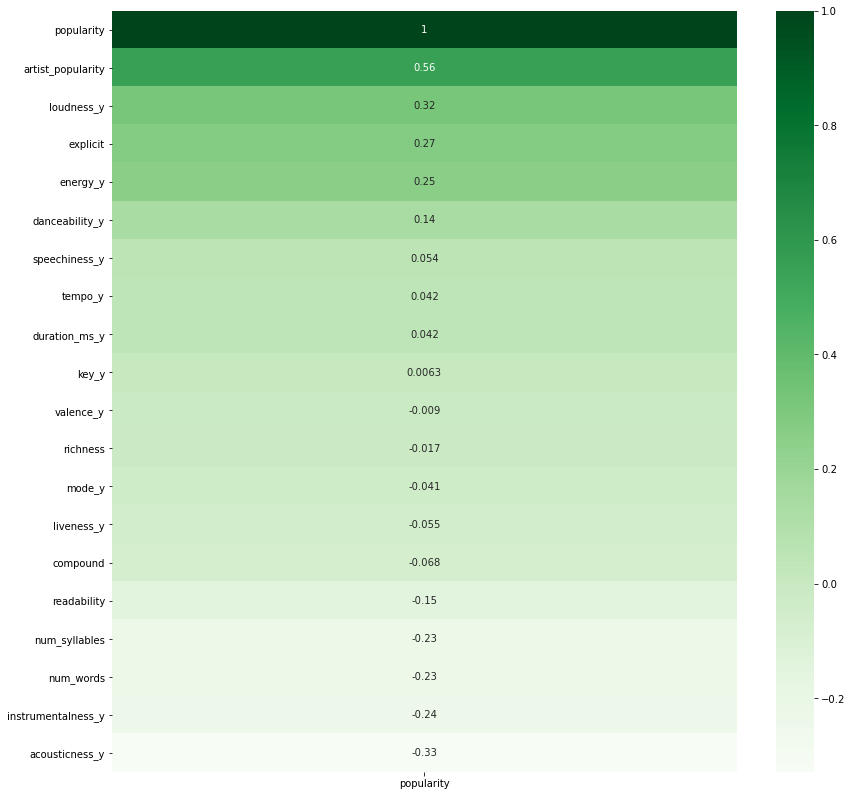

In [44]:
plt.figure(figsize=(14,14))
cor = pred1.corr()
x = cor [['popularity']].sort_values(by='popularity', ascending=False)
sns.heatmap(x, annot=True, cmap=plt.cm.Greens)
plt.show()

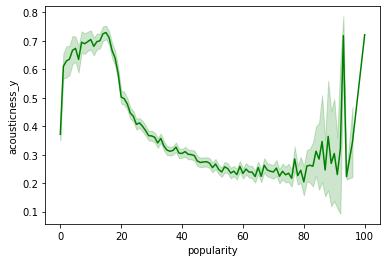

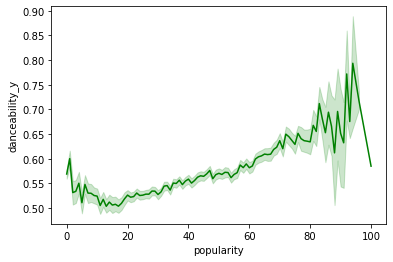

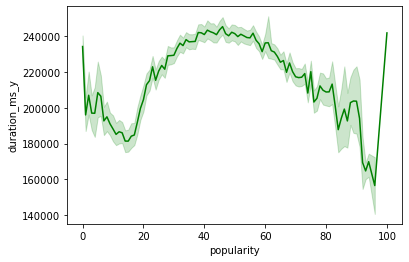

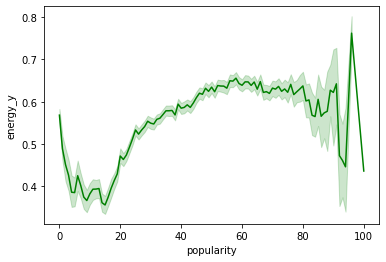

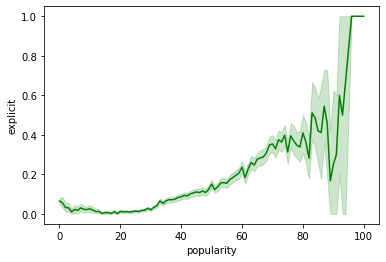

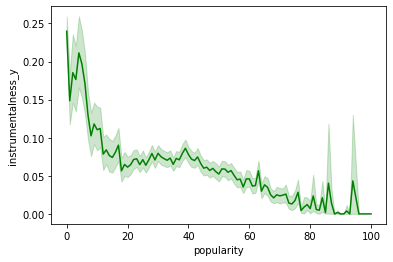

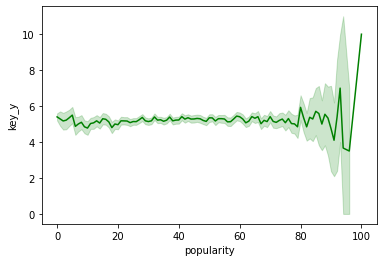

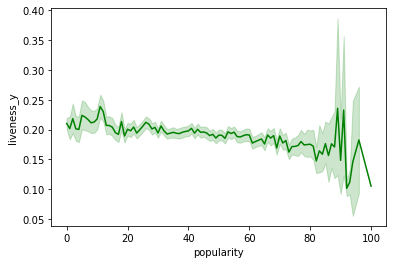

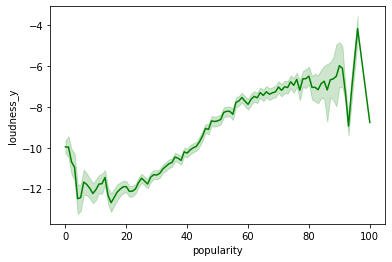

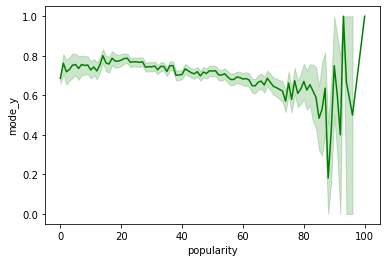

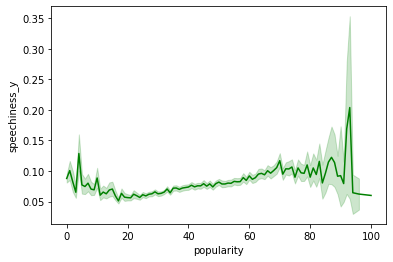

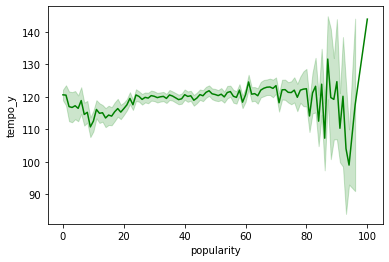

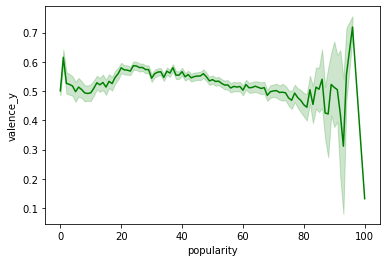

In [47]:
for i in acoustic_col:
    sns.lineplot(y = i, x ='popularity' , data = d2, color='g')
    plt.show()

In [181]:
y1 = pred1['popularity'].copy()
X1=pred1[acoustic_col+lyrics_col].copy()

In [37]:
y2 = d2['popularity'].copy()
X2=d2[acoustic_col+lyrics_col].copy()

In [182]:
X1.shape

(83074, 20)

In [169]:
X2.shape

(66452, 20)

In [183]:
scale_features1= X1.drop(['explicit','mode_y','compound_vader_polarity'],axis=1).columns

In [38]:
scale_features2= X2.drop(['explicit','mode_y'],axis=1).columns

In [39]:
scale_features2.shape

(17,)

In [193]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1, y1,train_size=0.8,random_state=1234)

In [40]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2, y2,train_size=0.8,random_state=1234)

In [74]:
def model(X_train, y_train, X_test, y_test,scale_features):
    scaler = StandardScaler()
    scaler.fit(X_train[scale_features])
    X_train[scale_features]= scaler.transform(X_train[scale_features])
    X_test[scale_features]= scaler.transform(X_test[scale_features])
    
    model = {
      "Linear": LinearRegression(),
      "Random Forest": RandomForestRegressor(),
      "DecisionTress": DecisionTreeRegressor(),
      "SVR":SVR(kernel='rbf'),
      "XGBoost": XGBRegressor(),
      "AdaBoost": AdaBoostRegressor()
    }
    
    model_performance = []
    
    for i, k in tqdm(enumerate(model)):
        print(k)
        ml = model[k]
        print(ml)
        ml.fit(X_train, y_train)
        predictions = ml.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)
        rmse = math.sqrt(mean_squared_error(y_test, predictions))
        mape = mean_absolute_percentage_error(y_test, predictions)
        model_performance.append([k, mae,rmse,mape])
        
    df_perform = pd.DataFrame(model_performance,columns=['Model','MAE','RMSE','MAPE'])    
    return df_perform

In [195]:
%time model(X_train1, y_train1, X_test1, y_test1,scale_features1)  # not remove outliers

0it [00:00, ?it/s]

Linear
LinearRegression()
Random Forest
RandomForestRegressor()


2it [01:31, 45.87s/it]

DecisionTress
DecisionTreeRegressor()


3it [01:33, 27.38s/it]

SVR
SVR()


4it [06:35, 129.77s/it]

XGBoost
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


5it [06:38, 85.83s/it] 

AdaBoost
AdaBoostRegressor()


6it [06:45, 67.54s/it]

CPU times: user 7min 2s, sys: 3.35 s, total: 7min 5s
Wall time: 6min 45s


,Model,MAE,RMSE,MAPE
0,Linear,12.115266,15.079115,4.713078e+15
1,Random Forest,10.006501,12.942894,1.986761e+15
2,DecisionTress,13.728197,18.237279,1.750481e+15
3,SVR,10.966012,14.069012,3.756613e+15
4,XGBoost,10.177954,13.010382,2.315121e+15
5,AdaBoost,12.712617,15.293601,4.587341e+15


In [196]:
%time model(X_train2, y_train2, X_test2, y_test2,scale_features2)  # remove outliers

0it [00:00, ?it/s]

Linear
LinearRegression()
Random Forest
RandomForestRegressor()


2it [01:10, 35.41s/it]

DecisionTress
DecisionTreeRegressor()


3it [01:12, 21.17s/it]

SVR
SVR()


4it [04:36, 89.53s/it]

XGBoost
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


5it [04:39, 59.49s/it]

AdaBoost
AdaBoostRegressor()


6it [04:42, 47.12s/it]

CPU times: user 4min 54s, sys: 2.99 s, total: 4min 57s
Wall time: 4min 42s


,Model,MAE,RMSE,MAPE
0,Linear,11.446482,14.263187,2.031674e+15
1,Random Forest,10.219684,13.015285,1.284400e+15
2,DecisionTress,14.333308,18.734237,1.263217e+15
3,SVR,10.595450,13.490804,1.962035e+15
4,XGBoost,10.210843,13.004824,1.236663e+15
5,AdaBoost,12.181551,14.789813,1.866010e+15


## multi-class sentiment

In [63]:
mood1 = pd.read_csv("lyrics_pred_class_lda.csv",index_col=0)

In [65]:
mood1.classes.value_counts()

1    30089
2    21984
3     8870
0     4269
4     1240
Name: classes, dtype: int64

In [66]:
com2 = pd.concat([d2,mood1],axis=1)
com2.head()

,acousticness_y,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,valence_y,num_words,num_syllables,readability,richness,compound,artist_popularity,popularity,classes
0,0.0309,0.593,187286,0.450,0,0.00187,2,0.334,-10.679,1,0.0307,112.054,0.454,783.0,735.0,-5.036,0.177977,-0.9857,0.000000,0,3
1,0.9760,0.369,103333,0.228,0,0.00000,1,0.150,-9.628,1,0.0300,82.394,0.572,186.0,152.0,90.502,0.076503,-0.8895,5.000000,0,2
2,0.3660,0.631,324882,0.682,0,0.00000,9,0.338,-10.486,0,0.0417,150.061,0.386,495.0,527.0,33.028,0.254582,0.9856,46.000000,0,2
3,0.9260,0.670,170333,0.351,0,0.00531,0,0.168,-5.714,1,0.0693,140.253,0.580,183.0,179.0,-61.661,0.191257,-0.5831,38.000000,0,1
4,0.9620,0.572,186227,0.164,0,0.00346,0,0.247,-15.842,1,0.0471,78.439,0.661,486.0,434.0,69.626,0.200000,0.6788,60.848402,0,1


In [67]:
com2.shape

(66452, 21)

In [68]:
pd.get_dummies(com2['classes'])

,0,1,2,3,4
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
66447,0,0,0,1,0
66448,0,0,1,0,0
66449,0,0,1,0,0
66450,0,0,0,1,0


In [69]:
com2 = pd.concat([com2, pd.get_dummies(com2['classes'])], axis = 1)
com2.drop(columns = ['classes'], inplace = True)

In [70]:
com2.rename(columns={0:'neutral', 1:'happy', 2:'sad',3:'hate',4:'anger'}, inplace = True)

In [71]:
com2

,acousticness_y,danceability_y,duration_ms_y,energy_y,explicit,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,valence_y,num_words,num_syllables,readability,richness,compound,artist_popularity,popularity,neutral,happy,sad,hate,anger
0,0.0309,0.593,187286,0.450,0,0.001870,2,0.3340,-10.679,1,0.0307,112.054,0.454,783.0,735.0,-5.036,0.177977,-0.9857,0.000000,0,0,0,0,1,0
1,0.9760,0.369,103333,0.228,0,0.000000,1,0.1500,-9.628,1,0.0300,82.394,0.572,186.0,152.0,90.502,0.076503,-0.8895,5.000000,0,0,0,1,0,0
2,0.3660,0.631,324882,0.682,0,0.000000,9,0.3380,-10.486,0,0.0417,150.061,0.386,495.0,527.0,33.028,0.254582,0.9856,46.000000,0,0,0,1,0,0
3,0.9260,0.670,170333,0.351,0,0.005310,0,0.1680,-5.714,1,0.0693,140.253,0.580,183.0,179.0,-61.661,0.191257,-0.5831,38.000000,0,0,1,0,0,0
4,0.9620,0.572,186227,0.164,0,0.003460,0,0.2470,-15.842,1,0.0471,78.439,0.661,486.0,434.0,69.626,0.200000,0.6788,60.848402,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66447,0.1610,0.617,237507,0.921,1,0.000000,9,0.0887,-3.200,1,0.1790,184.028,0.688,528.0,586.0,5.758,0.282443,0.9189,72.000000,55,0,0,0,1,0
66448,0.7190,0.738,134453,0.538,0,0.000013,2,0.0653,-10.118,1,0.0374,97.487,0.810,218.0,264.0,-116.886,0.298165,-0.9280,65.000000,57,0,0,1,0,0
66449,0.1220,0.613,262800,0.683,0,0.000000,2,0.2410,-11.156,1,0.0332,128.416,0.637,221.0,221.0,-102.080,0.325792,0.9471,72.000000,34,0,0,1,0,0
66450,0.0914,0.393,290907,0.878,0,0.000000,4,0.3190,-7.519,0,0.0558,176.646,0.898,645.0,641.0,94.296,0.142857,0.6269,61.000000,35,0,0,0,1,0


In [72]:
y_com1 = com2['popularity'].copy()
X_com1=com2.drop(['popularity','compound'], axis=1).copy()
scale_features4= X_com1.drop(['explicit','mode_y','neutral', 'happy', 'sad', 'hate', 'anger'],axis=1).columns
X_train4,X_test4,y_train4,y_test4 = train_test_split(X_com1, y_com1,train_size=0.8,random_state=1234)

In [75]:
%time model(X_train4, y_train4, X_test4, y_test4, scale_features4)  

0it [00:00, ?it/s]

Linear
LinearRegression()
Random Forest
RandomForestRegressor()


2it [01:08, 34.13s/it]

DecisionTress
DecisionTreeRegressor()


3it [01:09, 20.42s/it]

SVR
SVR()


4it [04:40, 91.66s/it]

XGBoost
XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)


5it [04:43, 60.70s/it]

AdaBoost
AdaBoostRegressor()


6it [04:47, 47.90s/it]

CPU times: user 4min 59s, sys: 2.7 s, total: 5min 2s
Wall time: 4min 47s


,Model,MAE,RMSE,MAPE
0,Linear,11.446399,14.262121,2.031917e+15
1,Random Forest,10.177185,12.984243,1.261395e+15
2,DecisionTress,14.338776,18.675045,1.202903e+15
3,SVR,10.553671,13.447464,1.942002e+15
4,XGBoost,10.227129,13.001096,1.235344e+15
5,AdaBoost,12.310571,14.931811,1.824756e+15
